                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex  \
0      ... >= 7 years                 4                        male : single  

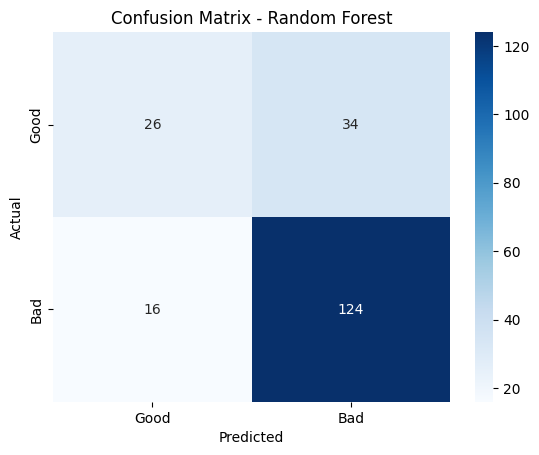

ROC-AUC Score (Random Forest): 0.7827380952380952


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
data = pd.read_csv(url)

print(data.head())
print(data.info())
print(data["credit_risk"].value_counts())

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split features and target
X = data.drop("credit_risk", axis=1)
y = data["credit_risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good","Bad"], yticklabels=["Good","Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC-AUC score
y_proba_rf = rf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score (Random Forest):", auc)


 Project 3: Credit Scoring Model (German Credit Dataset) 

--- Dataset Info ---
                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex 

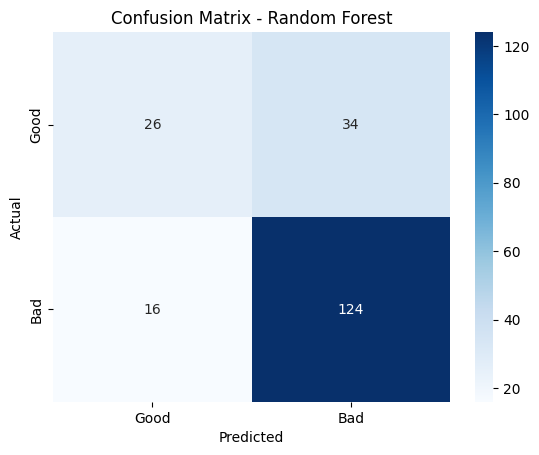


--- ROC-AUC Score ---
ROC-AUC Score (Random Forest): 0.7827380952380952


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("\n" + "="*50)
print(" Project 3: Credit Scoring Model (German Credit Dataset) ")
print("="*50)

url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
data = pd.read_csv(url)

print("\n--- Dataset Info ---")
print(data.head())
print(data.info())

if "credit_risk" not in data.columns:
    raise ValueError("Target column 'credit_risk' not found in dataset!")

print("\n--- Target Distribution ---")
print(data["credit_risk"].value_counts())

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    if col != "credit_risk":
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

X = data.drop("credit_risk", axis=1)
y = data["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n--- Training Logistic Regression ---")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n--- Training Random Forest ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Accuracy Results ---")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- Confusion Matrix (Random Forest) ---")
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good","Bad"], yticklabels=["Good","Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("\n--- ROC-AUC Score ---")
y_proba_rf = rf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score (Random Forest):", auc)